In [1]:
import pandas as pd 
import numpy as np
from sqlalchemy import create_engine, text
from sqlalchemy import URL
from sqlalchemy import create_engine

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
def create_table(username, password,db_name):
    url_object = URL.create(
        "mysql+mysqlconnector",
        username=username,
        password=password,
        host="localhost",
        database=db_name
    )
    return create_engine(url_object)

In [3]:
engine = create_table('root', 'Farideh@2376', 'SuperStore')

In [4]:
query = """
SELECT Sales, Quantity,  discount, Profit, `Shipping Cost`,`Product Name`, p.Category, p.`Sub-Category`,Market, `Ship Mode`,Segment, COALESCE(returned, 0) AS returned
FROM order_detail
JOIN product p ON order_detail.`Product ID` = p.`Product ID`
JOIN shipping s ON order_detail.`Order ID` = s.`Order ID`
JOIN `order` o ON o.`Order ID` = order_detail.`Order ID`
JOIN customer c ON o.`Customer ID` = c.`Customer ID`
LEFT JOIN returned r ON order_detail.`Order ID` = r.`Order ID`
"""


df=pd.DataFrame(engine.connect().execute(text(query)))

In [5]:
df

,Sales,Quantity,discount,Profit,Shipping Cost,Product Name,Category,Sub-Category,Market,Ship Mode,Segment,returned
0,673.568,2,0.200,252.5880,54.960,GBC DocuBind 200 Manual Binding Machine,Office Supplies,Binders,US,Standard Class,Consumer,0
1,52.980,2,0.000,14.8344,3.170,Fellowes Advanced Computer Series Surge Protec...,Office Supplies,Appliances,US,Standard Class,Consumer,0
2,14.940,3,0.000,7.0218,0.990,Staples,Office Supplies,Paper,US,Standard Class,Consumer,0
3,14.560,2,0.000,6.2608,1.310,"Master Caster Door Stop, Large Neon Orange",Furniture,Furnishings,US,Standard Class,Consumer,0
4,26.960,2,0.000,7.0096,5.230,Tenex Personal Project File with Scoop Front D...,Office Supplies,Storage,US,First Class,Consumer,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49665,1127.810,3,0.200,-126.8820,72.710,"Office Star Executive Leather Armchair, Adjust...",Furniture,Chairs,EU,Standard Class,Consumer,0
49666,87.984,2,0.400,7.3040,9.110,"Tenex Frame, Black",Furniture,Furnishings,LATAM,Standard Class,Consumer,1
49667,872.320,2,0.000,8.7200,68.222,"Cisco Smart Phone, with Caller ID",Technology,Phones,LATAM,Second Class,Consumer,0
49668,590.117,3,0.002,69.7374,106.680,"Sharp Fax Machine, Laser",Technology,Copiers,LATAM,Second Class,Consumer,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49670 entries, 0 to 49669
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales          49670 non-null  float64
 1   Quantity       49670 non-null  int64  
 2   discount       49670 non-null  float64
 3   Profit         49670 non-null  float64
 4   Shipping Cost  49670 non-null  float64
 5   Product Name   49670 non-null  object 
 6   Category       49670 non-null  object 
 7   Sub-Category   49670 non-null  object 
 8   Market         49670 non-null  object 
 9   Ship Mode      49670 non-null  object 
 10  Segment        49670 non-null  object 
 11  returned       49670 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 4.5+ MB


In [7]:
X = df.drop(["Profit"],axis=1)
y = df['Profit']


In [8]:
from sklearn.model_selection import train_test_split

# Splitting data into train, validation and test sets with ratio of 80:10:10
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [9]:
# check the shape of X_train and X_test and X_val

X_train.shape, X_test.shape ,X_val.shape

((39736, 11), (4967, 11), (4967, 11))

In [10]:
#X_Train encoders
import category_encoders as ce
encoder = ce.BaseNEncoder(cols=['Category','Market','Product Name','Ship Mode','Sub-Category','Segment'], base=3)
X_train = encoder.fit_transform(X_train)
X_train.head(10)


,Sales,Quantity,discount,Shipping Cost,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Product Name_5,...,Sub-Category_0,Sub-Category_1,Sub-Category_2,Market_0,Market_1,Ship Mode_0,Ship Mode_1,Segment_0,Segment_1,returned
28676,76.560,4,0.0,7.000,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
39317,88.080,2,0.4,7.902,0,0,0,0,0,0,...,0,0,2,0,2,0,2,0,1,0
15298,21.024,2,0.4,0.949,0,0,0,0,0,0,...,0,1,0,0,2,0,2,0,2,0
23261,53.040,6,0.0,4.943,0,0,0,0,0,0,...,0,1,1,0,2,0,1,0,1,0
20904,14.940,3,0.0,1.800,0,0,0,0,0,0,...,0,1,2,1,0,0,2,0,1,0
37556,13.590,3,0.0,5.730,0,0,0,0,0,0,...,0,2,0,0,1,1,0,0,1,0
34854,199.960,4,0.0,20.260,0,0,0,0,0,0,...,0,2,1,1,0,1,0,0,1,0
48969,96.900,2,0.0,5.830,0,0,0,0,0,0,...,0,2,2,0,1,0,2,0,1,0
6703,1933.200,8,0.1,218.820,0,0,0,0,0,1,...,1,0,0,1,1,0,2,0,1,0
35045,269.980,2,0.0,15.940,0,0,0,0,0,1,...,1,0,1,1,0,0,2,1,0,0


In [11]:
#X_val encoders
import category_encoders as ce
encoder = ce.BaseNEncoder(cols=['Category','Market','Product Name','Ship Mode','Sub-Category','Segment'], base=3)
X_val = encoder.fit_transform(X_val)
X_val.head(10)

,Sales,Quantity,discount,Shipping Cost,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Product Name_5,...,Sub-Category_0,Sub-Category_1,Sub-Category_2,Market_0,Market_1,Ship Mode_0,Ship Mode_1,Segment_0,Segment_1,returned
24410,28.4000,2,0.00,0.900,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
10500,336.8000,2,0.20,25.797,0,0,0,0,0,0,...,0,0,2,0,2,0,2,0,2,0
25810,44.9700,1,0.00,2.010,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
46072,617.9700,3,0.00,145.460,0,0,0,0,0,0,...,0,1,1,0,1,0,2,1,0,0
14168,142.4700,1,0.00,6.350,0,0,0,0,0,0,...,0,1,2,1,1,1,0,1,0,0
10175,61.2540,1,0.70,0.980,0,0,0,0,0,0,...,0,2,0,1,2,1,0,1,0,0
3220,164.3400,6,0.00,7.290,0,0,0,0,0,0,...,0,2,1,2,0,1,0,0,1,0
3104,125.3070,3,0.10,3.950,0,0,0,0,0,0,...,0,2,2,1,0,1,0,0,1,0
49401,11.9886,2,0.47,1.720,0,0,0,0,0,1,...,1,0,0,1,0,1,0,1,0,0
20988,223.9380,2,0.10,13.070,0,0,0,0,0,1,...,0,1,2,1,0,1,0,1,0,0


In [12]:
#X_Test encoders
import category_encoders as ce
encoder = ce.BaseNEncoder(cols=['Category','Market','Product Name','Ship Mode','Sub-Category','Segment'], base=3)
X_test = encoder.fit_transform(X_test)
X_test.head(10)

,Sales,Quantity,discount,Shipping Cost,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Product Name_5,...,Sub-Category_0,Sub-Category_1,Sub-Category_2,Market_0,Market_1,Ship Mode_0,Ship Mode_1,Segment_0,Segment_1,returned
14598,366.744,4,0.30,73.320,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
28773,16.140,1,0.00,3.170,0,0,0,0,0,0,...,0,0,2,0,2,0,2,0,2,0
35357,134.983,3,0.17,13.900,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
22528,31.104,6,0.20,4.870,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,2,0
6684,225.568,2,0.20,47.180,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,2,0
48861,37.980,2,0.00,16.890,0,0,0,0,0,0,...,0,1,2,1,0,0,2,1,0,0
35419,39.640,2,0.00,5.867,0,0,0,0,0,0,...,0,1,1,1,1,0,1,0,1,0
34656,200.250,5,0.00,6.210,0,0,0,0,0,0,...,0,0,2,1,0,0,2,0,2,0
30751,73.425,5,0.50,8.760,0,0,0,0,0,1,...,0,2,0,1,0,0,1,0,2,0
39762,35.040,5,0.40,3.823,0,0,0,0,0,1,...,0,2,1,1,1,0,1,0,2,0


In [13]:
# check the shape of X_train and X_test and X_val

X_train.shape, X_test.shape ,X_val.shape,y_val.shape

((39736, 24), (4967, 24), (4967, 24), (4967,))

In [14]:
cols = X_train.columns


In [15]:
y_train

28676    16.8000
39317   -42.6000
15298    -5.6160
23261     6.8400
20904     6.8724
          ...   
11284     5.3700
44732   -23.0850
38158     4.4800
860       3.2560
15795     7.9200
Name: Profit, Length: 39736, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MaxAbsScaler

columns_to_scale = [ 'Profit', 'Shipping Cost','Quantity']

scaler = QuantileTransformer()
#x
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
#y
scalerY = QuantileTransformer()
y_train = scalerY.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_val = scalerY.transform(y_val.to_numpy().reshape(-1, 1))
y_test = scalerY.transform(y_test.to_numpy().reshape(-1, 1))
X_train

array([[0.47115142, 0.67917918, 0.        , ..., 0.        , 0.43543544,
        0.        ],
       [0.50976658, 0.30580581, 0.83333333, ..., 0.        , 0.43543544,
        0.        ],
       [0.16968599, 0.30580581, 0.83333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.36712094, 0.67917918, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.29965036, 0.30580581, 0.83333333, ..., 0.        , 0.43543544,
        0.        ],
       [0.20195779, 0.        , 0.        , ..., 0.        , 0.43543544,
        0.        ]])

### arrays to DataFrame

In [17]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train.head()

,Sales,Quantity,discount,Shipping Cost,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Product Name_5,...,Sub-Category_0,Sub-Category_1,Sub-Category_2,Market_0,Market_1,Ship Mode_0,Ship Mode_1,Segment_0,Segment_1,returned
0,0.471151,0.679179,0.000000,0.478407,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.494494,0.000000,0.490991,0.0,0.272773,0.0,0.435435,0.0
1,0.509767,0.305806,0.833333,0.510370,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.0,0.435435,0.0
2,0.169686,0.305806,0.833333,0.091992,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.473974,0.000000,0.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0
3,0.381607,0.862863,0.000000,0.392133,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.473974,0.494494,0.000000,1.000000,0.0,0.272773,0.0,0.435435,0.0
4,0.112112,0.525025,0.000000,0.182182,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.473974,1.000000,0.641141,0.000000,0.0,1.000000,0.0,0.435435,0.0


In [18]:
X_val = pd.DataFrame(X_val, columns=[cols])

In [19]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [20]:
y_train = pd.DataFrame(y_train, columns=['Profit'])

y_val = pd.DataFrame(y_val, columns=['Profit'])

y_test = pd.DataFrame(y_test, columns=['Profit'])
y_test

,Profit
0,0.039097
1,0.453114
2,0.754135
3,0.530993
4,0.334910
...,...
4962,0.234417
4963,0.515598
4964,0.935290
4965,0.093075


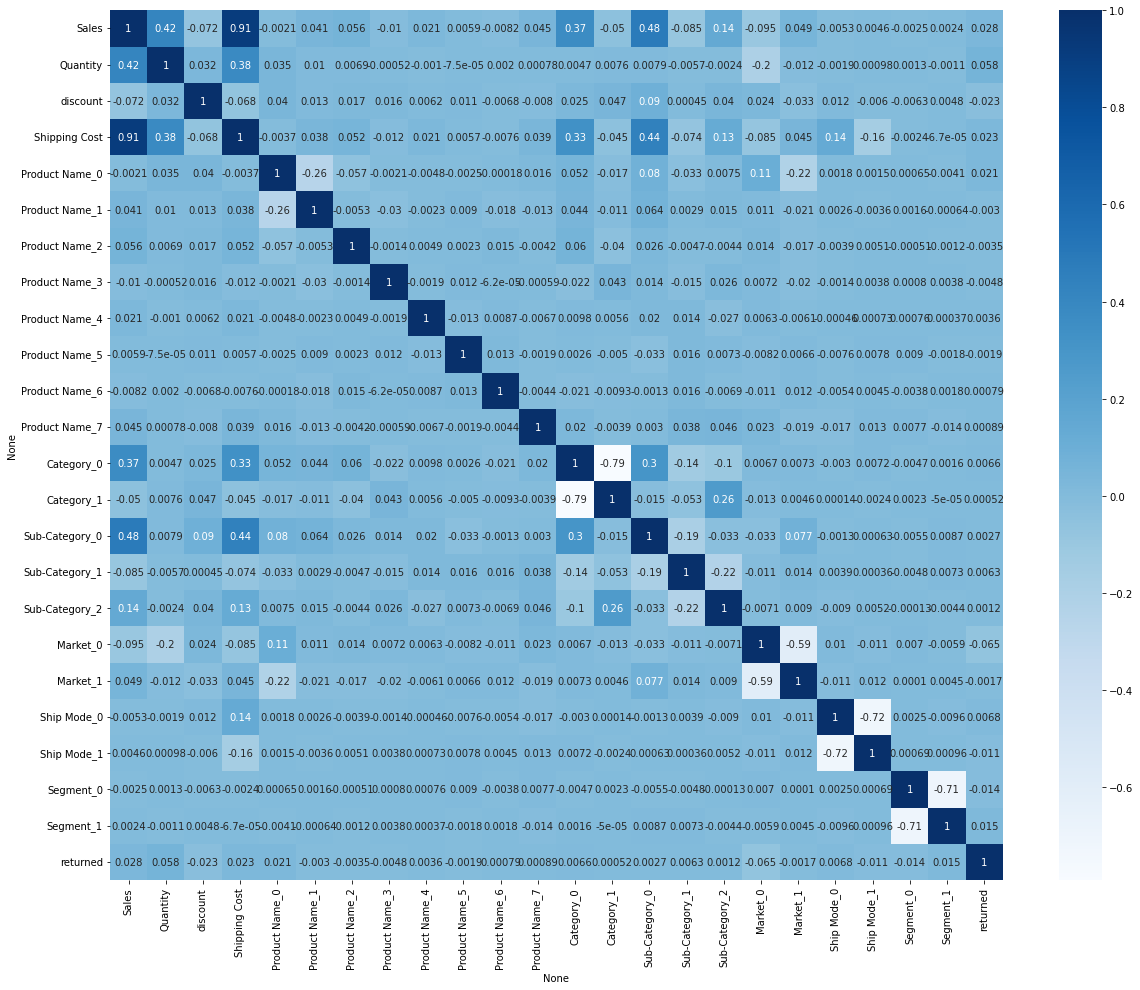

In [21]:
plt.figure(figsize=(20,16))
sns.heatmap(X_train.corr(),annot=True,cmap='Blues');

# XGBRegressor 

In [43]:
from xgboost import XGBRegressor 

model_xgb = XGBRegressor(n_estimators=100, max_depth=15 ,learning_rate=0.12)
model_xgb.fit(X_train, y_train)

# Finally, predict on val data
pred_val_xgb = model_xgb.predict(X_val)

r2_val_xgb = r2_score(y_val, pred_val_xgb).round(4)
mse_val_xgb = mean_squared_error(y_val, pred_val_xgb).round(4)
rmse_val_xgb = np.sqrt(mean_squared_error(y_val, pred_val_xgb)).round(4)
mae_val_xgb = mean_absolute_error(y_val, pred_val_xgb).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_val_xgb)
print(f'\033[92m')
print('MSE       : ', mse_val_xgb)
print('RMSE      : ', rmse_val_xgb)
print('MAE       : ', mae_val_xgb)



R2 Score  :  0.619

MSE       :  0.0318
RMSE      :  0.1784
MAE       :  0.1216



# RandomForestRegressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=70, max_features=50)
model_RandomForestRegressor.fit(X_train, y_train)

# Finally, predict on val data
pred_test_RandomForestRegressor = model_RandomForestRegressor.predict(X_val)

r2_test_RandomForestRegressor = r2_score(y_val, pred_test_RandomForestRegressor).round(4)
mse_test_RandomForestRegressor = mean_squared_error(y_val, pred_test_RandomForestRegressor).round(4)
rmse_test_RandomForestRegressor = np.sqrt(mean_squared_error(y_val, pred_test_RandomForestRegressor)).round(4)
mae_test_RandomForestRegressor = mean_absolute_error(y_val, pred_test_RandomForestRegressor).round(4)


print(f'\033[94m')
print('R2 Score : ', r2_test_RandomForestRegressor)
print(f'\033[92m')
print('MSE      : ', mse_test_RandomForestRegressor)
print('RMSE     : ', rmse_test_RandomForestRegressor)
print('MAE      : ', mae_test_RandomForestRegressor)


R2 Score :  0.6583

MSE      :  0.0285
RMSE     :  0.1689
MAE      :  0.1205


# HistGradientBoostingRegressor

In [44]:
from sklearn.ensemble import HistGradientBoostingRegressor

model_HistGradientBoostingRegressor = HistGradientBoostingRegressor()
model_HistGradientBoostingRegressor.fit(X_train, y_train)

# Finally, predict on val data
pred_test_HistGradientBoostingRegressor = model_HistGradientBoostingRegressor.predict(X_val)

r2_test_HistGradientBoostingRegressor = r2_score(y_val, pred_test_HistGradientBoostingRegressor).round(4)
mse_test_HistGradientBoostingRegressor = mean_squared_error(y_val, pred_test_HistGradientBoostingRegressor).round(4)
rmse_test_HistGradientBoostingRegressor = np.sqrt(mean_squared_error(y_val, pred_test_HistGradientBoostingRegressor)).round(4)
mae_test_HistGradientBoostingRegressor = mean_absolute_error(y_val, pred_test_HistGradientBoostingRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_HistGradientBoostingRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_HistGradientBoostingRegressor)
print('RMSE      : ', rmse_test_HistGradientBoostingRegressor)
print('MAE       : ', mae_test_HistGradientBoostingRegressor)


R2 Score  :  0.6675

MSE       :  0.0278
RMSE      :  0.1667
MAE       :  0.1143


# ExtraTreesRegressor

In [46]:
from sklearn.ensemble import ExtraTreesRegressor

model_ExtraTreesRegressor = ExtraTreesRegressor(n_estimators=100,max_depth=30,min_samples_split=35, bootstrap=True)
model_ExtraTreesRegressor.fit(X_train, y_train)

# Finally, predict on val data
pred_test_ExtraTreesRegressor = model_ExtraTreesRegressor.predict(X_val)

r2_test_ExtraTreesRegressor = r2_score(y_val, pred_test_ExtraTreesRegressor).round(4)
mse_test_ExtraTreesRegressor = mean_squared_error(y_val, pred_test_ExtraTreesRegressor).round(4)
rmse_test_ExtraTreesRegressor = np.sqrt(mean_squared_error(y_val, pred_test_ExtraTreesRegressor)).round(4)
mae_test_ExtraTreesRegressor= mean_absolute_error(y_val, pred_test_ExtraTreesRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_ExtraTreesRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_ExtraTreesRegressor)
print('RMSE      : ', rmse_test_ExtraTreesRegressor)
print('MAE       : ', mae_test_ExtraTreesRegressor)


R2 Score  :  0.6757

MSE       :  0.0271
RMSE      :  0.1646
MAE       :  0.1158


# AdaBoostRegressor

In [47]:
from sklearn.ensemble import AdaBoostRegressor

model_AdaBoostRegressor = AdaBoostRegressor(n_estimators=50, learning_rate=0.1999,random_state=0)
model_AdaBoostRegressor.fit(X_train, y_train)

# Finally, predict on val data
pred_test_AdaBoostRegressor = model_AdaBoostRegressor.predict(X_val)

r2_test_AdaBoostRegressor = r2_score(y_val, pred_test_AdaBoostRegressor).round(4)
mse_test_AdaBoostRegressor = mean_squared_error(y_val, pred_test_AdaBoostRegressor).round(4)
rmse_test_AdaBoostRegressor = np.sqrt(mean_squared_error(y_val, pred_test_AdaBoostRegressor)).round(4)
mae_test_AdaBoostRegressor= mean_absolute_error(y_val, pred_test_AdaBoostRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_AdaBoostRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_AdaBoostRegressor)
print('RMSE      : ', rmse_test_AdaBoostRegressor)
print('MAE       : ', mae_test_AdaBoostRegressor)



R2 Score  :  0.6345

MSE       :  0.0305
RMSE      :  0.1747
MAE       :  0.1343


In [48]:
models = pd.DataFrame({
    
    'Model': [
        'XGBRegressor', 'RandomForestRegressor',
        'HistGradientBoostingRegressor', 'ExtraTreesRegressor',
        'AdaBoostRegressor'
    ],
    
    'R2 Score': [
        r2_val_xgb, r2_test_RandomForestRegressor,
        r2_test_HistGradientBoostingRegressor, r2_test_ExtraTreesRegressor,
        r2_test_AdaBoostRegressor
    
    ],
    
    'MSE': [
        mse_val_xgb, mse_test_RandomForestRegressor,
        mse_test_HistGradientBoostingRegressor, mse_test_ExtraTreesRegressor,
        mse_test_AdaBoostRegressor
    ],
    
    'RMSE': [
         rmse_val_xgb, rmse_test_RandomForestRegressor,
        rmse_test_HistGradientBoostingRegressor, rmse_test_ExtraTreesRegressor,
        rmse_test_AdaBoostRegressor
    ],
    
    'MAE': [
         mae_val_xgb, mae_test_RandomForestRegressor,
         mae_test_HistGradientBoostingRegressor, mae_test_ExtraTreesRegressor,
         mae_test_AdaBoostRegressor
    ]
    
})


In [49]:
models

,Model,R2 Score,MSE,RMSE,MAE
0,XGBRegressor,0.6190,0.0318,0.1784,0.1216
1,RandomForestRegressor,0.6583,0.0285,0.1689,0.1205
2,HistGradientBoostingRegressor,0.6675,0.0278,0.1667,0.1143
3,ExtraTreesRegressor,0.6757,0.0271,0.1646,0.1158
4,AdaBoostRegressor,0.6345,0.0305,0.1747,0.1343


In [50]:
models.sort_values(by='R2 Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,R2 Score,MSE,RMSE,MAE
ExtraTreesRegressor,0.675700,0.027100,0.164600,0.115800
HistGradientBoostingRegressor,0.667500,0.027800,0.166700,0.114300
RandomForestRegressor,0.658300,0.028500,0.168900,0.120500
AdaBoostRegressor,0.634500,0.030500,0.174700,0.134300
XGBRegressor,0.619000,0.031800,0.178400,0.121600


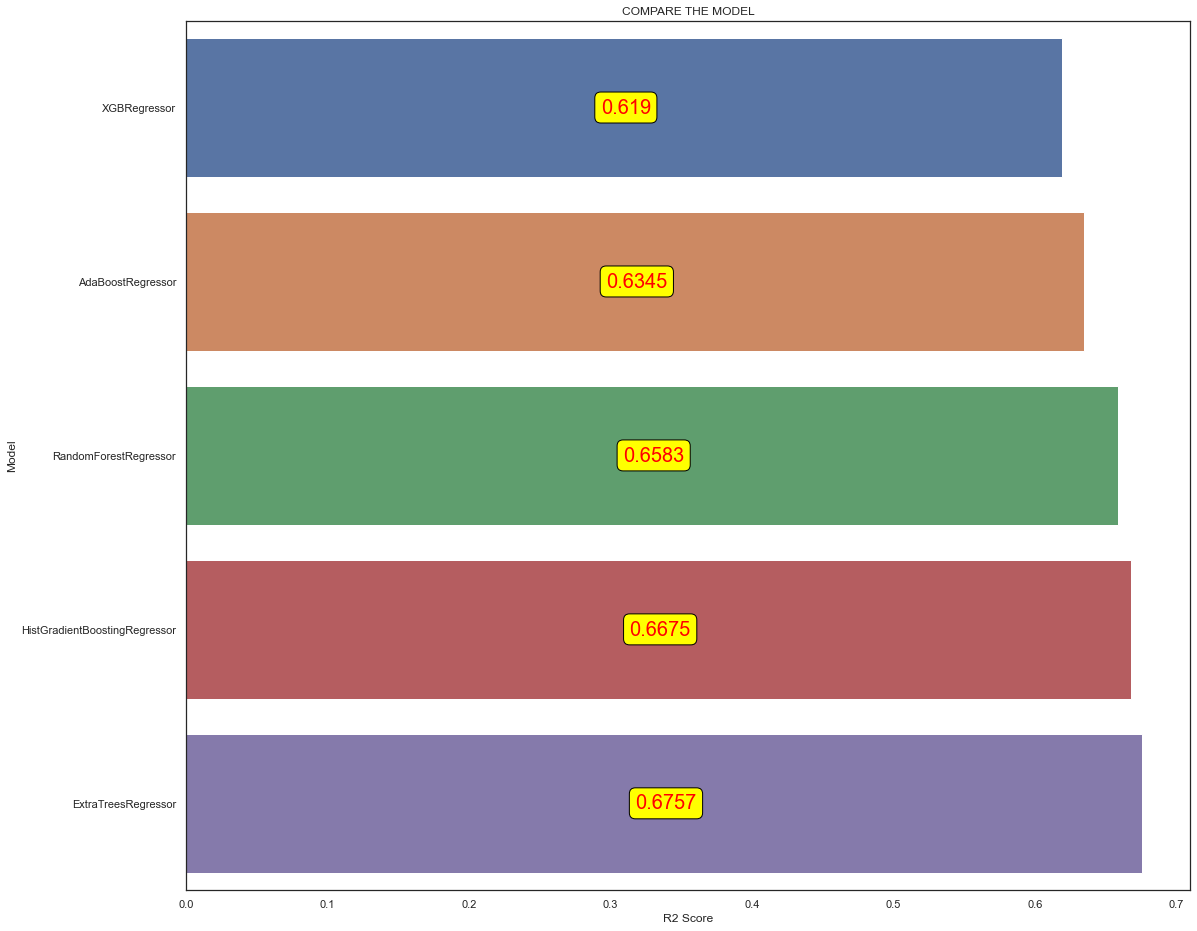

In [51]:
p = plt.figure(figsize=(18,16))

p = sns.set_theme(style="white")

p= models=models.sort_values(by='R2 Score',ascending=True)[:20]

p = sns.barplot(y= 'Model', x= 'R2 Score', data= models)

for container in p.containers:
    p.bar_label(container,label_type = 'center',padding = 2,size = 20,color = "Red",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.3, "facecolor": "yellow", "edgecolor": "black", "alpha": 1})
plt.title('COMPARE THE MODEL')
plt.xlabel('R2 Score')
plt.ylabel('Model');

# Best Performing Model : RandomForestRegressor

In [52]:
print(f'\033[94m')
prediction = model_RandomForestRegressor.predict(X_test)
prediction

array([0.33802196, 0.38094913, 0.57256907, ..., 0.58237508, 0.46901117,
       0.62376238])

In [53]:
cross_checking = pd.DataFrame({'Actual' : y_test['Profit'].values.ravel(), 'Predicted' : prediction.ravel()})
cross_checking.head()

,Actual,Predicted
0,0.039097,0.338022
1,0.453114,0.380949
2,0.754135,0.572569
3,0.530993,0.399041
4,0.334910,0.482349


In [54]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
0,0.039097,0.338022,-0.298925
1,0.453114,0.380949,0.072165
2,0.754135,0.572569,0.181566
3,0.530993,0.399041,0.131951
4,0.334910,0.482349,-0.147440


In [55]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(10).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
4838,0.684309,0.541302,0.143007
4540,0.725688,0.582125,0.143563
947,0.887607,0.696186,0.191422
4561,0.250250,0.714110,-0.463860
4052,0.016561,0.015302,0.001259
3654,0.530881,0.437017,0.093863
4945,0.422673,0.414036,0.008637
2805,0.315415,0.318599,-0.003183
3909,0.773085,0.574658,0.198428
1807,0.923932,0.905804,0.018128


In [57]:
sorted_models = models.sort_values(by='R2 Score', ascending=False)  #
cross_checking_final.to_csv('cross_checking_final.csv', index=False)